In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data=datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data=datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 44894297.73it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 2038189.12it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 14456536.47it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 1432693.75it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [7]:
train_data.targets.size()

torch.Size([60000])

In [8]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [9]:
from torch.utils.data import DataLoader

loaders={
    'train':DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    'test':DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1),
}

In [10]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fcae3fc69b0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fcae3fc5090>}

In [29]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    self.conv1=nn.Conv2d(1,10, kernel_size=5)
    self.conv2=nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop=nn.Dropout2d()
    self.fcl=nn.Linear(320,50)
    self.fc2=nn.Linear(50,10)

  def forward(self,x):
    x=F.relu(F.max_pool2d(self.conv1(x),2))
    x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x=x.view(-1,320)
    x=F.relu(self.fcl(x))
    x=F.dropout(x,training=self.training)
    x=self.fc2(x)

    return F.softmax(x)

In [38]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn=nn.CrossEntropyLoss()

def train (epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target=data.to(device),target.to(device)
    optimizer.zero_grad()
    output=model(data)
    loss=loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20==0:
      print(f'Train Epoch: {epoch} [{batch_idx*len(data)}/{len(loaders["train"].dataset)} ({100. *batch_idx/len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()
    test_loss=0
    correct=0
    with torch.no_grad():
      for data, target in loaders['test']:
          data, target=data.to(device), target.to(device)
          output=model(data)
          test_loss+=loss_fn(output,target).item()
          pred=output.argmax(dim=1,keepdim=True)
          correct+=pred.eq(target.view_as(pred)).sum().item()
    test_loss/=len(loaders['test'].dataset)
    print(f'\nTest set: Averageloss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. *correct/len(loaders["test"].dataset):.0f}%\n)')

In [39]:
for epoch in range(1, 11):
    train(epoch)
    test()

<ipython-input-29-6877b50a68d0>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.301911
Train Epoch: 1 [2000/60000 (3%)]	2.290030
Train Epoch: 1 [4000/60000 (7%)]	2.166595
Train Epoch: 1 [6000/60000 (10%)]	1.985938
Train Epoch: 1 [8000/60000 (13%)]	1.955963
Train Epoch: 1 [10000/60000 (17%)]	1.895705
Train Epoch: 1 [12000/60000 (20%)]	1.853693
Train Epoch: 1 [14000/60000 (23%)]	1.790501
Train Epoch: 1 [16000/60000 (27%)]	1.743587
Train Epoch: 1 [18000/60000 (30%)]	1.772213
Train Epoch: 1 [20000/60000 (33%)]	1.762797
Train Epoch: 1 [22000/60000 (37%)]	1.707706
Train Epoch: 1 [24000/60000 (40%)]	1.722522
Train Epoch: 1 [26000/60000 (43%)]	1.724942
Train Epoch: 1 [28000/60000 (47%)]	1.684887
Train Epoch: 1 [30000/60000 (50%)]	1.635787
Train Epoch: 1 [32000/60000 (53%)]	1.648215
Train Epoch: 1 [34000/60000 (57%)]	1.653811
Train Epoch: 1 [36000/60000 (60%)]	1.669556
Train Epoch: 1 [38000/60000 (63%)]	1.629839
Train Epoch: 1 [40000/60000 (67%)]	1.634267
Train Epoch: 1 [42000/60000 (70%)]	1.615118
Train Epoch: 1 [44000/60000 (73%)]	1.661333

In [40]:
device

device(type='cpu')

predict: 7


<ipython-input-29-6877b50a68d0>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


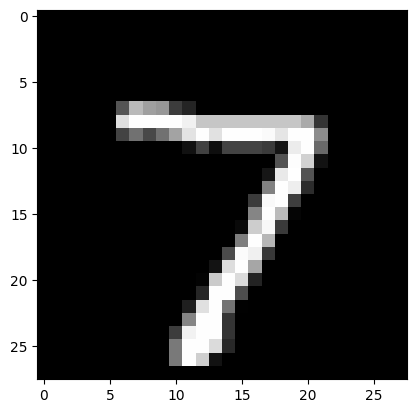

In [41]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[0]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'predict: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()

predict: 1


<ipython-input-29-6877b50a68d0>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


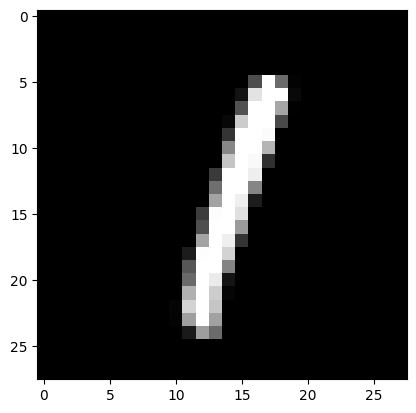

In [44]:
model.eval()
data, target = test_data[5]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'predict: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()

<ipython-input-29-6877b50a68d0>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


predict: 9


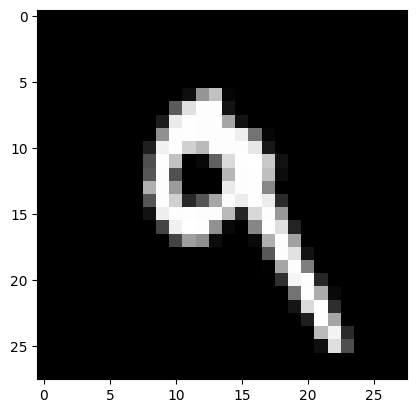

In [45]:
model.eval()
data, target = test_data[7]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'predict: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()